<a href="https://colab.research.google.com/github/MinsooKwak/Project/blob/main/nlp_project_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section4 : NLP project (감성분류 모델)

## 0. Background, 시나리오

### 1. 배경

In [1]:
### 배경 및 데이터 선정 이유

### 2. 시나리오

맞춤형 티 서비스를 제공하는 회사에 데이터사이언티스트로 부임하게 되었다. Tea 회사의 마케팅 팀장은 코로나 이후 매출이 줄어들었다며 새로운 서비스의 제공과 변화가 필요하다 말했다. 이에 나는 코로나라는 위기의 상황을 또 다른 기회로 삼을 수 있을 것이라 가정하며 코로나 상황에서 인간의 감성을 터치할 것을 제안하였다. 자신의 일상을 쉽게 터놓지 못하는 사람들이 자신의 상황을 언어로서 표현하도록 하고 (현재는 글, 추후 음성과 결합 가능) 감성을 분석해 맞춤형 티 서비스를 제공하는 것이다. 이로써 소비자는 자신의 감성을 부수적으로 케어 받을 수 있으며 티 서비스 역시 제공 받을 수 있다. 마케팅 팀장은 아이디어를 받아들였고, 나는 일상대화 데이터를 이용하여 딥러닝을 이용한 감성 분석에 착수했다. 

In [2]:
# 대화 예시 ; 추후 PPT에서 활용해서 대화 카톡형식으로 구성

M: "코로나 이후 매출이 줄어들어 걱정이예요. 매출을 올릴 수 있는 또 다른 서비스와 변화가 필요해요." </br> </br>
DS: "코로나라는 상황이 어려운 상황이지만, 또 기회로 작용할 수 있을 것 같아요.<br> 코로나라는 상황 속에 사람과 사람 사이의 관계의 단절이 발생하는 상황을 활용해보는 건 어떨까요? 
</br> 코로나로 인해 활동량도 줄고 사람간의 관계가 줄어들면서 점차 자신의 감정을 터놓지 못하는 현상이 늘어나고 있어요. 따라서 자신의 상황을 비공개적으로 터놓을 수 있도록 하고, 감성을 분석해 맞춤형 티 서비스를 제공하면 어떨까요?" <br> </br>

### 0. Data import

In [ ]:
# 폰트 설치
'''
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
'''

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
cd /content/drive/MyDrive/section4_project/nlp_dataset/감성대화/

/content/drive/MyDrive/section4_project/nlp_dataset/감성대화


In [6]:
import pandas as pd
import numpy as np

In [7]:
pwd

'/content/drive/MyDrive/section4_project/nlp_dataset/감성대화'

In [8]:
ls

AppleGothic.ttf  감성대화말뭉치_Training.xlsx  감성대화말뭉치_Validation.xlsx


1. Data frame : Train set, validation set

In [9]:
train_dataset = pd.read_excel('감성대화말뭉치_Training.xlsx')

In [10]:
validation_dataset = pd.read_excel('감성대화말뭉치_Validation.xlsx')

In [11]:
print(f'train data shape: {train_dataset.shape} \nvalidation data shape: {validation_dataset.shape}')

train data shape: (40879, 15) 
validation data shape: (5130, 15)


2. Row dataframe 

In [12]:
train_dataset.head(3)

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
0,44164,청년,남성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,아내가 드디어 출산하게 되어서 정말 신이 나.,아내분이 출산을 하시는군요. 정말 축하드려요.,아 지금 정말 신이 나.,잘 된 일이네요.,아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.,좋은 아빠가 되실 거 같아요. 진심으로 축하드려요.,NaN,NaN
1,3926,노년,남성,"건강, 죽음",만성질환 유,불안,스트레스 받는,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,약 종류가 많아 번거로우시겠어요.,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.,현재 상황에서 변화를 주기 위해 어떻게 하면 될까요?,약을 잘 챙겨 먹고 나을 수 있도록 노력해야지.,약을 잘 챙겨 먹어 건강해지시길 바랄게요.,NaN,NaN
2,50882,청소년,여성,학업 및 진로,해당없음,당황,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요.,아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼.,이 상황에서 할 수 있는 게 어떤 것이 있을까요?,중학교 수업을 들을 때보다 훨씬 더 열심히 할 거야.,수업을 어떤 방식으로 열심히 듣는게 좋을까요?,선생님이 강조하신 부분을 필기하고 집에서 매일 수업 내용을 복습하려고 해.,열심히 해서 좋은 결과가 있었으면 좋겠어요.


In [13]:
validation_dataset.head(3)

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
0,23093,청년,여성,"진로, 취업, 직장",해당없음,분노,툴툴대는,요즘 부모님과 많이 부딪혀.,어떤 일로 부딪히시나요?,난 하고 싶은 일이 있는데 부모님은 안정적인 일만 하라고 하셔. 내 마음대로 하지도...,부모님과의 충돌로 힘드시겠군요.,응. 그래도 난 내가 하고 싶은 일을 위해 노력할 거야.,자신이 하고 싶은 일을 목표로 하기로 하셨군요.,NaN,NaN
1,32848,청소년,남성,가족관계,해당없음,슬픔,비통한,엄마가 결국 집을 나갔어. 너무 너무 슬퍼.,어머니께서 집을 나가셨다니 정말 슬프셨겠어요. 좀 더 자세히 얘기해주시겠어요?,엄마도 엄마만의 인생이 있을 테니 가지 말라고 할 수가 없었어. 그래서 더 마음이 ...,정말 많이 답답하셨겠어요. 어떻게 하는 게 기분이 좀 풀릴까요?,일단 좀 자야겠어.,일단 휴식을 가질 생각이시군요.,NaN,NaN
2,35590,청소년,남성,학교폭력/따돌림,해당없음,불안,조심스러운,학교에서 한 친구를 괴롭히는 무리에게 그만하라고 했어.,용기 있는 행동을 하셨네요. 마음이 어떠셨나요?,그런데 말을 하고 난 후 나도 괴롭힐까 봐 불안했어.,그랬군요. 지금 기분에서 벗어나기 위해 할 수 있는 일에는 무엇이 있을까요?,나는 옳은 일을 한 거라고 생각해. 나까지 괴롭힌다면 신고할 거야.,지금의 상황이 나의 방식으로써 잘 해결될 수 있기를 바라요.,NaN,NaN


## 1. 방향성 설정

AI-Hub에서 제공한 말뭉치 대화 데이터셋은 사람과 시스템 사이에 대화 내용이 담긴 데이터셋이다. </br> 연령, 성별, 상황과 신체 질환 여부를 포함하고 있으며 감정에 대한 분류 역시 담겨있다. </br> 또한 대화 상황으로 이뤄져 있으므로 사람과 시스템 응답이 번갈아 차례로 등장하고 있다. </br></br> 먼저, 연령, 성별, 상황키워드, 신체질환여부가 감정과 어떠한 상관성이 있는지 간략하게 파악해볼 것이다. </br> 그리고 본 분석 의도에 따라 상황에 따른 인간의 언어에 대한 감성분석을 목적으로 하기 때문에 </br> 감정과 사람의 문장에 대한 부분 추출하여 사용하고자 한다. 사람의 문장에 대한 부분안 합쳐 사용할 것이다. 

## 2. Dataframe 수정

사람문장과 시스템 문장을 병합해야 하는 이유: </br>
1. 결측치 처리
2. 본 프로젝트의 목적은 문장에 따른 감성분석으로 병합해서 사용해도 무관하다.

### 1) Row dataframe의 결측치 확인 

In [14]:
train_dataset.isnull().sum()

번호            0
연령            0
성별            0
상황키워드         0
신체질환          0
감정_대분류        0
감정_소분류        0
사람문장1         0
시스템응답1        0
사람문장2         0
시스템응답2        0
사람문장3      9820
시스템응답3     9820
사람문장4     39407
시스템응답4    39517
dtype: int64

In [15]:
validation_dataset.isnull().sum()

번호           0
연령           0
성별           0
상황키워드        0
신체질환         0
감정_대분류       0
감정_소분류       0
사람문장1        0
시스템응답1       0
사람문장2        0
시스템응답2       0
사람문장3     1256
시스템응답3    1256
사람문장4     4979
시스템응답4    4994
dtype: int64

### 2) 사람문장과 시스템응답을 각기 병합

In [16]:
human_cols = ['사람문장1','사람문장2','사람문장3','사람문장4']
system_cols = ['시스템응답1','시스템응답2','시스템응답3','시스템응답4']

train_dataset['human_document'] =train_dataset[human_cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
validation_dataset['human_document']=validation_dataset[human_cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

train_dataset['system_document']= train_dataset[system_cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
validation_dataset['system_document']= validation_dataset[system_cols].apply(lambda row:' '.join(row.values.astype(str)), axis=1)

In [17]:
train_dataset.isnull().sum()

번호                     0
연령                     0
성별                     0
상황키워드                  0
신체질환                   0
감정_대분류                 0
감정_소분류                 0
사람문장1                  0
시스템응답1                 0
사람문장2                  0
시스템응답2                 0
사람문장3               9820
시스템응답3              9820
사람문장4              39407
시스템응답4             39517
human_document         0
system_document        0
dtype: int64

In [18]:
validation_dataset.isnull().sum()

번호                    0
연령                    0
성별                    0
상황키워드                 0
신체질환                  0
감정_대분류                0
감정_소분류                0
사람문장1                 0
시스템응답1                0
사람문장2                 0
시스템응답2                0
사람문장3              1256
시스템응답3             1256
사람문장4              4979
시스템응답4             4994
human_document        0
system_document       0
dtype: int64

병합된 feature들 (human_document, system_document)에는 결측치가 없는 것으로 나타났다. </br> 다음으로 필요한 부분만 추출하여 데이터프레임을 구성할 것이다.

### 3) 재구성한 dataframe

In [19]:
train_df = train_dataset[['번호','연령','성별','상황키워드','신체질환','감정_대분류','감정_소분류','human_document','system_document']]
validation_df = validation_dataset[['번호','연령','성별','상황키워드','신체질환','감정_대분류','감정_소분류','human_document','system_document']]

재구성한 train dataframe

In [20]:
train_df.head() 

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,human_document,system_document
0,44164,청년,남성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,아내가 드디어 출산하게 되어서 정말 신이 나. 아 지금 정말 신이 나. 아기가 점점...,아내분이 출산을 하시는군요. 정말 축하드려요. 잘 된 일이네요. 좋은 아빠가 되실 ...
1,3926,노년,남성,"건강, 죽음",만성질환 유,불안,스트레스 받는,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야. 건강할 때 ...,약 종류가 많아 번거로우시겠어요. 현재 상황에서 변화를 주기 위해 어떻게 하면 될까...
2,50882,청소년,여성,학업 및 진로,해당없음,당황,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워. 아직 학기 ...,고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요. 이 상황에서...
3,31303,노년,남성,재정,만성질환 무,기쁨,신이 난,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해. ...,재취업 후 첫 월급이라 정말 기쁘시겠어요. 이 기분을 유지하려면 어떻게 해야 할까요...
4,47200,노년,여성,재정,만성질환 유,기쁨,안도,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어. 빚도 다 갚았으니 당분간은 아무...,기분 좋으시겠어요. 앞으로는 어떻게 하실 생각이신가요? 빚도 다 갚았으니 당분간은 ...


재구성한 validation dataframe

In [21]:
validation_df.head()

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,human_document,system_document
0,23093,청년,여성,"진로, 취업, 직장",해당없음,분노,툴툴대는,요즘 부모님과 많이 부딪혀. 난 하고 싶은 일이 있는데 부모님은 안정적인 일만 하라...,어떤 일로 부딪히시나요? 부모님과의 충돌로 힘드시겠군요. 자신이 하고 싶은 일을 목...
1,32848,청소년,남성,가족관계,해당없음,슬픔,비통한,엄마가 결국 집을 나갔어. 너무 너무 슬퍼. 엄마도 엄마만의 인생이 있을 테니 가지...,어머니께서 집을 나가셨다니 정말 슬프셨겠어요. 좀 더 자세히 얘기해주시겠어요? 정말...
2,35590,청소년,남성,학교폭력/따돌림,해당없음,불안,조심스러운,학교에서 한 친구를 괴롭히는 무리에게 그만하라고 했어. 그런데 말을 하고 난 후 나...,용기 있는 행동을 하셨네요. 마음이 어떠셨나요? 그랬군요. 지금 기분에서 벗어나기 ...
3,169,청년,남성,"진로, 취업, 직장",해당없음,당황,죄책감의,이번에 팀장님이 간단한 조사 업무를 부탁하셨는데 내가 잘못 처리했어. 너무 절망적이...,팀장님이 부탁하신 업무를 잘못 처리하셔서 많이 당황하시고 놀라셨겠어요. 마음이 많이...
4,38435,중년,여성,"재정, 은퇴, 노후준비",해당없음,분노,노여워하는,남편이 이혼할 때 위자료를 주지 않으려고 변호사를 고용했어. 어떻게 그럴 수가 있지...,많이 화가 나시겠어요. 어떻게 하면 지금의 감정을 추스를 수 있을까요? 자녀분들이랑...


## 3. Understanding Data Set 및 기본 전처리

기존의 데이터가 train data와 validation data로 나눠져 있기 때문에, 전체적인 데이터에 대한 이해를 위해 병합된 데이터셋이 필요하다. </br>
(아래 과정은 데이터를 병합하고 병합한 데이터셋에 대하여 다시 진행한다.)

0. 데이터셋의 크기

In [22]:
df= pd.concat([train_df, validation_df], axis=0, ignore_index=True)

In [23]:
df

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,human_document,system_document
0,44164,청년,남성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,아내가 드디어 출산하게 되어서 정말 신이 나. 아 지금 정말 신이 나. 아기가 점점...,아내분이 출산을 하시는군요. 정말 축하드려요. 잘 된 일이네요. 좋은 아빠가 되실 ...
1,3926,노년,남성,"건강, 죽음",만성질환 유,불안,스트레스 받는,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야. 건강할 때 ...,약 종류가 많아 번거로우시겠어요. 현재 상황에서 변화를 주기 위해 어떻게 하면 될까...
2,50882,청소년,여성,학업 및 진로,해당없음,당황,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워. 아직 학기 ...,고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요. 이 상황에서...
3,31303,노년,남성,재정,만성질환 무,기쁨,신이 난,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해. ...,재취업 후 첫 월급이라 정말 기쁘시겠어요. 이 기분을 유지하려면 어떻게 해야 할까요...
4,47200,노년,여성,재정,만성질환 유,기쁨,안도,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어. 빚도 다 갚았으니 당분간은 아무...,기분 좋으시겠어요. 앞으로는 어떻게 하실 생각이신가요? 빚도 다 갚았으니 당분간은 ...
...,...,...,...,...,...,...,...,...,...
46004,37859,중년,남성,"재정, 은퇴, 노후준비",해당없음,기쁨,느긋,부동산 임대 소득으로 현재 여유롭게 살 수 있어서 좋단다. 그래서 마음의 안정을 가...,여유롭게 생활할 수 있어 좋으시겠어요. 그렇군요. 계속해서 여유로우려면 어떡해야 좋...
46005,40171,노년,여성,"건강, 죽음",만성질환 유,불안,회의적인,폐결핵은 이미 완치된 것 같은데 약을 한 달이나 더 먹으라고 하네? 아직 안 나은 ...,치료가 완료되지 않은 게 아닐까 싶으셔서 염려하고 계시는군요. 많이 불안하시군요. ...
46006,13717,청년,남성,"연애, 결혼, 출산",해당없음,분노,좌절한,연애하고 싶은데 소개팅만 나가면 꽝이야. 이러다가 난 결혼 못 하고 늙어 죽을 거야...,소개팅에서 만나는 사람과 계속 잘 안 풀려서 많이 좌절하신 것 같아요. 댄스 동호...
46007,33784,노년,남성,재정,만성질환 유,분노,안달하는,은행 대출이 막혀서 생활비를 구할 수가 없어. 이제 어떻게 살아야 하나 막막해. 당...,은행 대출이 안 돼서 마음이 괴로우시군요. 이 상황을 해결하기 위해서는 어떻게 할 ...


In [24]:
df.shape

(46009, 9)

1. 연령

In [25]:
df.연령.unique() # 전체 데이터셋에 대하여 연령의 구성을 살펴봄

array(['청년', '노년', '청소년', '중년'], dtype=object)

In [26]:
''' 분포 시각적으로 확인하기'''

' 분포 시각적으로 확인하기'

In [27]:
print((df.연령.value_counts(normalize=True)*100).round(2)) # 전체 테이터셋에 대한 연령 분포 확인 # 유사한 분포를 띄고 있음을 확인

청년     30.55
중년     26.53
노년     24.94
청소년    17.98
Name: 연령, dtype: float64


In [28]:
print((train_df.연령.value_counts(normalize=True)*100).round(2)) # train dataset에 대한 연령 분포 확인

청년     30.59
중년     26.63
노년     24.83
청소년    17.95
Name: 연령, dtype: float64


In [29]:
print((validation_df.연령.value_counts(normalize=True)*100).round(2)) # validation dataset에 대한 연령 분포 확인

청년     30.21
노년     25.81
중년     25.77
청소년    18.21
Name: 연령, dtype: float64


In [ ]:
'''
연령 분포를 확인한 결과 구성은 청년, 노년, 중년, 청소년으로 구성되어 있으며,
분포는 비교적 균일하게 나타나는 것으로 확인되었다. '''
### 추가적으로 확인 가능한 사항은 연령별 감정의 분포를 확인할 수 있을 것이다
### 이 경우 metabase를 사용하여 나타낼 수 있다. 

2. 성별

In [31]:
print((df.성별.value_counts(normalize=True)*100).round(2)) # 전체 데이터셋에서의 성별 분포

여성    55.6
남성    44.4
Name: 성별, dtype: float64


In [32]:
print((train_df.성별.value_counts(normalize=True)*100).round(2)) # train dataset에서의 성별 분포

여성    55.58
남성    44.42
Name: 성별, dtype: float64


In [33]:
print((validation_df.성별.value_counts(normalize=True)*100).round(2)) # validation dataset에서의 성별 분포

여성    55.81
남성    44.19
Name: 성별, dtype: float64


In [ ]:
'''
성별 분포를 확인해본 결과 전체 데이터셋, train dataset, validation dataset에 대하여
균일한 결과를 보이고 있다. '''
# 적절히 나뉘어졌으므로 분석에 용이하다. 

3. 신체 질환 여부

In [35]:
''' 
신체질환 여부에서의 결과는 다음과 같이 나타난다.
만성질환의 유무에 대해 나타나는 데이터인데, 만성질환 무와 해당없음은 같은 의미를 띄기 때문에 병합하도록 한다. '''
 #  두 가지로 구분되므로 pie chart로 비교할 수 있다.

' \n신체질환 여부에서의 결과는 다음과 같이 나타난다.\n만성질환의 유무에 대해 나타나는 데이터인데, 만성질환 무와 해당없음은 같은 의미를 띄기 때문에 병합하도록 한다. '

In [36]:
print((df.신체질환.value_counts(normalize=True)*100).round(2))

해당없음      75.06
만성질환 무    12.82
만성질환 유    12.12
Name: 신체질환, dtype: float64


In [37]:
### 또 추가적으로 가능한 것은 신체질환의 여부에 따른 감성의 연관성이다. ### 얼마나 영향력이 있는가?

4. 상황 키워드 : 상황 키워드에 관해선 여러개의 키워드가 같은 상황에 함께 존재하는 경우가 있기 때문에 따로 빼주어 분석하도록 한다. 

In [38]:
''' 
1: ,와 ' '기준으로 키워드를 분리
2: 키워드 별 분포 확인 (시각화)'''

sit_keyw_df = df[['상황키워드','감정_대분류']] 
sit_keyw_df

,상황키워드,감정_대분류
0,"연애, 결혼, 출산",기쁨
1,"건강, 죽음",불안
2,학업 및 진로,당황
3,재정,기쁨
4,재정,기쁨
...,...,...
46004,"재정, 은퇴, 노후준비",기쁨
46005,"건강, 죽음",불안
46006,"연애, 결혼, 출산",분노
46007,재정,분노


In [39]:
sit_keyw_df.상황키워드.unique()

array(['연애, 결혼, 출산', '건강, 죽음', '학업 및 진로', '재정', '재정, 은퇴, 노후준비', '건강',
       '학교폭력/따돌림', '대인관계', '진로, 취업, 직장', '가족관계', '직장, 업무 스트레스',
       '대인관계(부부, 자녀)'], dtype=object)

In [ ]:
'''
어떠한 상황키워드가 있는지 살펴본 결과, 
연애, 결혼, 출산. 건강, 죽음, 학업, 진로, 재정, 은퇴, 노후준비, 학교폭력/따돌림, 대인관계, 취업, 직장, 가족관계, 업무 스트레스, 대인관계(부부,자녀)의 경우로 나타난다.

동일한 종류의 키워드를 다른 형태로 표현해주는 경우가 있기 때문에 유사한 경우는 따로 묶도록 한다.

관계: 연애, 결혼, 학교폭력/따돌림, 대인관계, 가족관계, 대인관계(부부,자녀) 
진로 및 취업: 학업, 진로, 취업, 직장, 업무 스트레스, 
건강: 건강, 
생사: 죽음
생계: 재정, 은퇴, 노후준비 '''
# 위에 내용으로 동일하게 처리해줘야 함 (라벨링 또는 카테고리화 필요)

5. 감정: 대분류

In [41]:
df.감정_대분류.unique()

array(['기쁨', '불안', '당황', '슬픔', '분노', '상처', '불안 ', '기쁨 '], dtype=object)

In [42]:
# 진행해준 후에 value_count를 수행, 그 분포를 알아낸다. # 시각화는 metabase를 사용해도 좋을 것 같다. 
# ((우선 수정된 dataframe 필요))

'''추가적으로 진행해야 하는 사항'''
# 대분류 별로 소분류의 분포 확인

'추가적으로 진행해야 하는 사항'

In [43]:
# 전체 데이터셋에 대한 감정대분류 값 수정
df.replace('기쁨 ','기쁨', inplace=True)
df.replace('불안 ','불안', inplace=True)

# train_df에 대한 감정대분류 값 수정
train_df.replace('기쁨 ','기쁨', inplace=True)
train_df.replace('불안 ','불안', inplace=True)

# validation_df에 대한 감정대분류 값 수정
validation_df.replace('기쁨 ','기쁨', inplace=True)
validation_df.replace('불안 ','불안', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


감정대분류값이 잘 바뀌었는지 확인

In [44]:
df.감정_대분류.unique() # 전체 데이터셋에 대한 감정대분류값이 잘 바뀌었는지 확인

array(['기쁨', '불안', '당황', '슬픔', '분노', '상처'], dtype=object)

In [45]:
train_df.감정_대분류.unique() # train dataset 감정대분류 값이 원활히 바뀌었는지 확인

array(['기쁨', '불안', '당황', '슬픔', '분노', '상처'], dtype=object)

In [46]:
validation_df.감정_대분류.unique() # validation dataset 감정대분류 값이 잘 바뀌었는지 확인

array(['분노', '슬픔', '불안', '당황', '상처', '기쁨'], dtype=object)

--> 전체, train, validation dataset에서 감정 대분류 값이 잘 변형되었음을 확인할 수 있다. 

In [47]:
print((df.감정_대분류.value_counts(normalize=True)*100).round(2))

불안    17.90
분노    16.94
슬픔    16.90
기쁨    16.46
상처    16.17
당황    15.63
Name: 감정_대분류, dtype: float64


In [48]:
print((train_df.감정_대분류.value_counts(normalize=True)*100).round(2))

불안    17.93
분노    16.93
슬픔    16.92
기쁨    16.47
상처    16.20
당황    15.56
Name: 감정_대분류, dtype: float64


In [49]:
print((validation_df.감정_대분류.value_counts(normalize=True)*100).round(2))

불안    17.68
분노    17.02
슬픔    16.78
기쁨    16.39
당황    16.22
상처    15.91
Name: 감정_대분류, dtype: float64


--> 확인 결과 감정_대분류의 분포가 유사하므로 모델링을 진행하기에 적합한 데이터셋임을 확인할 수 있었다. </br>
--> 감정_대분류 카데코리가 타겟값이 될 것이다.

## 4. 모델링 사전 준비

### 데이터프레임 결측치 재확인

In [50]:
df.isnull().sum()

번호                 0
연령                 0
성별                 0
상황키워드              0
신체질환               0
감정_대분류             0
감정_소분류             0
human_document     0
system_document    0
dtype: int64

In [51]:
train_df.isnull().sum()

번호                 0
연령                 0
성별                 0
상황키워드              0
신체질환               0
감정_대분류             0
감정_소분류             0
human_document     0
system_document    0
dtype: int64

In [52]:
validation_df.isnull().sum()

번호                 0
연령                 0
성별                 0
상황키워드              0
신체질환               0
감정_대분류             0
감정_소분류             0
human_document     0
system_document    0
dtype: int64

### 모델링용 데이터프레임 형성

감정_대분류, human_document 부분만 추출하여 사용하도록 한다. </br>
여기서는 인간이 사용한 문장에 대한 감성분석이 목적이므로, 시스템 응답 부분인 system document는 배제하겠다. 

In [53]:
for_train = train_df[['감정_대분류','human_document']]
for_validation = validation_df[['감정_대분류','human_document']]

In [54]:
for_train.head(3)

,감정_대분류,human_document
0,기쁨,아내가 드디어 출산하게 되어서 정말 신이 나. 아 지금 정말 신이 나. 아기가 점점...
1,불안,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야. 건강할 때 ...
2,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워. 아직 학기 ...


In [55]:
for_validation.head(3)

,감정_대분류,human_document
0,분노,요즘 부모님과 많이 부딪혀. 난 하고 싶은 일이 있는데 부모님은 안정적인 일만 하라...
1,슬픔,엄마가 결국 집을 나갔어. 너무 너무 슬퍼. 엄마도 엄마만의 인생이 있을 테니 가지...
2,불안,학교에서 한 친구를 괴롭히는 무리에게 그만하라고 했어. 그런데 말을 하고 난 후 나...


### 일상대화에서 활용된 단어 분포 시각화 (Wordcloud 활용) : Row Data

In [56]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request

In [57]:
# 한글폰트 준비
urllib.request.urlretrieve("http://macsplex.com/?module=file&act=procFileDownload&file_srl=2851&sid=ea4a36b12467c4446c21e70762c7d10f&module_srl=2822g", filename="AppleGothic.ttf")

('AppleGothic.ttf', <http.client.HTTPMessage at 0x7f1a53cded90>)

분석을 위한 불용어 제거 및 토큰화


In [ ]:
'''
Spacy의 경우 한글 토큰화를 지원하고 있지 않기 때문에 다른 방안을 사용해야 한다. '''

In [105]:
# Stopwords를 위한 준비
comment_words = ''
stopwords = set(STOPWORDS)
stopwords.add('nan')
stopwords.add('내가')
# 불용어 추가시 : stopwords.add('')
tokenized_text = []

분석을 위한 기본 불용어 제거 후 시각화 (WordCloud)

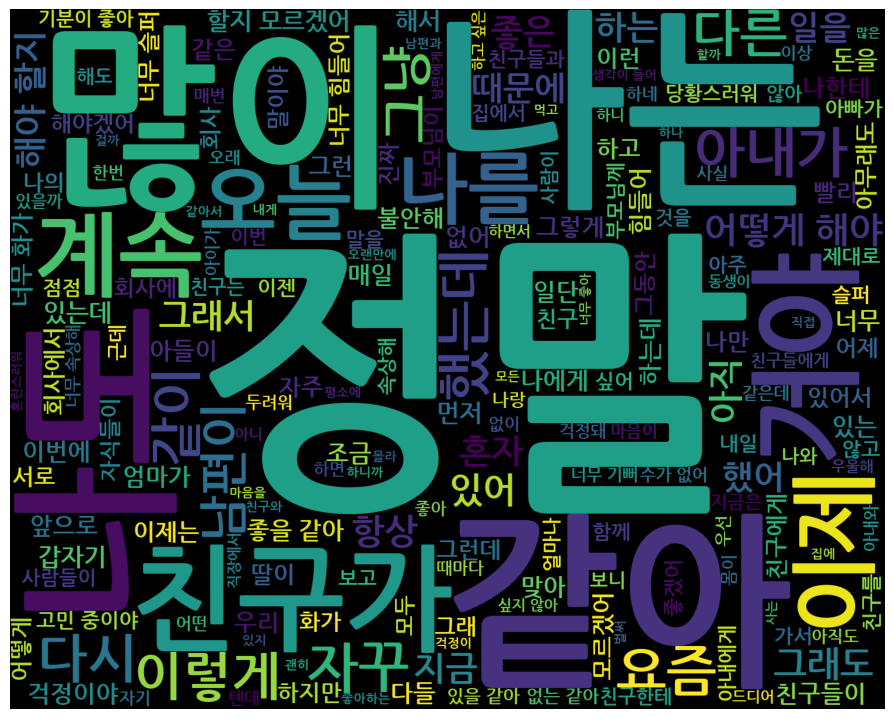

In [107]:
for val in df['human_document']:

  # 문장을 string 형식으로 변환
  val = str(val)

  # 문장 토큰화
  tokens = val.split()

  tokenized_text.append(tokens) # 위에서 만들어 놓은 tokenized_text에 tokens 더함
  comment_words += " ".join(tokens)+" " # 위에서 만들어놓은 comment_words에 tokens 결합

wordcloud = WordCloud(width=1500, height=1200,
                      font_path = 'AppleGothic.ttf',
                      background_color ='black',
                      stopwords = stopwords,
                      min_font_size=10).generate(comment_words) # color_map은 unexpected 되서 일단 제거해줌 #Set2

# plot WordCloud image
plt.figure(figsize=(10,7), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [ ]:
'''
제거해야 할 불용어들이 보임 : 
1. nan이 굉장히 많아 처리해줌, '내가'도 제거
2. 기타 불용어 추가 제거
'''

In [108]:
tokenized_text[0] # tokenized_text가 잘 형성되었는지 확인

['아내가',
 '드디어',
 '출산하게',
 '되어서',
 '정말',
 '신이',
 '나.',
 '아',
 '지금',
 '정말',
 '신이',
 '나.',
 '아기가',
 '점점',
 '클게',
 '벌써',
 '기대가',
 '되네.',
 '내가',
 '많이',
 '놀아줘야지.',
 'nan']

In [109]:
print(f'토큰화된 문장은 총 {len(tokenized_text)}개이다.')

토큰화된 문장은 총 46009개이다.


In [110]:
# 불용어 추가
stopwords2 = ['같아','거야','오늘','내일','계속','많이','그래서','그렇게','친구들이','것','내가','같아','내','수','게','나는','하고','친구가','그','한','거','다','나',
              '지금','건','나만','돼.','나한테','남편이','돈이','것이','이번에','회사','회사에서','나에게','아들이','친구에게','친구를','중이야.','매일','대해','사람들이',
              '돈','엄마가','딸이','어제','직장','얼마','친구들과','해도','번','일','회사에','운동을','공부를','시간을','그동안','부모님이','하나','몇','나의','나랑','시간이',
              '어떤','아빠가','학교','자식들이','아내와','자기','친구한테','나와','나이','친구랑','학교에서','아내에게','여자','친구들에게','건강','친구는','집에서','직장에서',
              '취업','자식들에게','김','남편과','후','집','친구들','남자','애들이','오늘은','전','회사를','두','집을','음식을','데','엄마한테','회사가','남편에게','직장을',
              '가족들과','온','엄마','요즘은','가족들에게','여자친구가','친구들이랑','옆집','아들에게','달','간','동료가','밥','아내를','친구들한테','부모님','직언이','사','삼',
              '아내','박','아내의','엄마랑','몸에','프로젝트를','의사','나에','아빠는','알','올','할머니가','하다','아이','남편이랑','중','드는','돈은','저녁에','아들과',
              '남편','아들','엄마는','학교에','의사가','아이들이','딸에게','자식들은','씨가','같아.','해.','거야','나를','나.','응.','하는','나도','요즘','거야']

In [111]:
# 불용어 필터 함수 형성
def filter_stopwords(tokenized_text, stopword2):
  '''
  토큰화된 텍스트에 새로 추가 할 불용어 리스트를 추가한다.
  '''
  tokenized_filtered =[] # 불용어 필터 리스트 생성

  for i in tokenized_text: # 토큰화된 텍스트를 순차적으로
    for word in i:  # 토큰화된 텍스트 안의 단어가
      if word not in stopwords and word not in stopwords2: # 만약 stopword와 stopwords2가 아니면
        tokenized_filtered.append(word) # 불용어 필터 리스트에 단어를 추가해준다

  return tokenized_filtered

In [112]:
# 위에서 정의한 불용어 필터 함수를 적용
tokenized_filtered = filter_stopwords(tokenized_text, stopwords2)

tokenized_filtered[0:10] #10개 출력해보기

['아내가', '드디어', '출산하게', '되어서', '정말', '신이', '아', '정말', '신이', '아기가']

--> 불용어가 제거되었음을 확인할 수 있다.

In [113]:
print(f'불용어 필터를 적용한 후의 토큰의 개수는 {len(tokenized_filtered)}개 이다.')

불용어 필터를 적용한 후의 토큰의 개수는 981161개 이다.


정제한 토큰을 시각화


- import operator를 통해 연산하는 방식과 collections의 Counter를 불러와 연산하는 방식 중에 고민했음 </br>
  --> import operator 방식을 적용해보겠음
  --> Bert를 사용할 것인데 문장을 넣어줘야 함

In [114]:
import operator

def word_count(tokenized_data):
  word_counter ={}

  for i in tokenized_data:
    if i in word_counter.keys():
      word_counter[i] += 1
    else:
      word_counter[i] =1
  
  sorted_dict = dict(sorted(word_counter.items(),
                            key=operator.itemgetter(1), reverse=True))
  return sorted_dict

In [115]:
tokenized_dict = word_count(tokenized_filtered)

In [116]:
# 상위 30개 단어 추출
def top_30(tokenized_dict):
  top_30_words = list(tokenized_dict.items())[:30] # 딕셔너리(dictionary)는 items()함수: 딕셔너리에 있는 키와 값들의 쌍을 얻을 수 있음
  return top_30_words

In [117]:
top_30(tokenized_dict)

[('너무', 16363),
 ('안', 9194),
 ('더', 6269),
 ('잘', 5642),
 ('정말', 4729),
 ('할', 4382),
 ('못', 3926),
 ('거야.', 3897),
 ('어떻게', 3531),
 ('모르겠어.', 3388),
 ('싶어.', 3362),
 ('좀', 3184),
 ('있는', 3069),
 ('때문에', 3038),
 ('다른', 3038),
 ('해서', 3032),
 ('있어.', 2780),
 ('열심히', 2740),
 ('우리', 2713),
 ('화가', 2604),
 ('좋은', 2581),
 ('없어.', 2525),
 ('왜', 2492),
 ('해야', 2454),
 ('이제', 2273),
 ('난', 2268),
 ('않아.', 2195),
 ('이', 2190),
 ('일을', 2186),
 ('같이', 2176)]

In [118]:
#상위 10개 단어 추출
def top_10(tokenized_dict):
  top_10_words = list(tokenized_dict.items())[:10]
  return top_10_words

top10 = top_10(tokenized_dict)

In [119]:
!pip install squarify

In [120]:
top10_df = pd.DataFrame(top10)
top10_df

,0,1
0,너무,16363
1,안,9194
2,더,6269
3,잘,5642
4,정말,4729
5,할,4382
6,못,3926
7,거야.,3897
8,어떻게,3531
9,모르겠어.,3388


TypeError: ignored

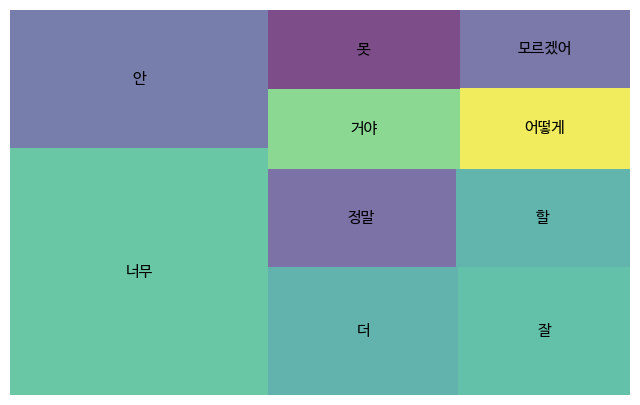

In [121]:
import squarify
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['font.size'] = 11
plt.rc('font', family='NanumBarunGothic') 

sizes = [14557,8165,5568,5020,4230,3932,3505,3485,3143,3019]
labels = ['너무','안','더','잘','정말','할','거야','못','어떻게','모르겠어']

squarify.plot(sizes, label=labels, alpha=0.7)
plt.axis('off')
squarify.plot()
plt.show()

### BERT 모델 사용 전 준비

BERT에 사용할 모듈 import

In [122]:
!pip install transformers

In [123]:
import torch

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, Adafactor, BertConfig
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [124]:
import random
import time
import datetime 

BERT 활용을 위한 GPU

In [ ]:
# colab을 사용할 것이기 때문에 colab 내부 GPU를 활용해볼 것임
'''
n_devices = torch.cuda.device_count()
print(n_devices)

for i in range(n_devices):
  print(torch.cuda.get_device_name(i))
'''

## BERT 모델링

In [125]:
# BERT에 맞는 Tag 달기
bert_text = []

for i in for_train['human_document']:
  bert = ["[CLS] "+str(i)+" [SEP]"]
  bert_text.append(bert)

In [126]:
bert_text[:5]

[['[CLS] 아내가 드디어 출산하게 되어서 정말 신이 나. 아 지금 정말 신이 나. 아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.  nan [SEP]'],
 ['[CLS] 당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야. 건강할 때 관리 좀 잘할걸 하는 생각이 들더라고. 약을 잘 챙겨 먹고 나을 수 있도록 노력해야지. nan [SEP]'],
 ['[CLS] 고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워. 아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼. 중학교 수업을 들을 때보다 훨씬 더 열심히 할 거야. 선생님이 강조하신 부분을 필기하고 집에서 매일 수업 내용을 복습하려고 해. [SEP]'],
 ['[CLS] 재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해. 퇴직 후 다시는 돈을 못 벌 줄 알았는데 이렇게 월급으로 가족에게 맛있는 밥을 살 수 있어서 너무 행복해. 회사생활을 열심히 해서 계속 월급을 받을거야! nan [SEP]'],
 ['[CLS] 빚을 드디어 다 갚게 되어서 이제야 안도감이 들어. 빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶어. nan nan [SEP]']]

In [131]:
# validation dataset에도 Tag 달기
val_text = []

for i in for_validation['human_document']:
  bert = ["[CLS] "+str(i)+" [SEP]"]
  val_text.append(bert)

In [132]:
val_text[:5]

[['[CLS] 요즘 부모님과 많이 부딪혀. 난 하고 싶은 일이 있는데 부모님은 안정적인 일만 하라고 하셔. 내 마음대로 하지도 못해. 응. 그래도 난 내가 하고 싶은 일을 위해 노력할 거야. nan [SEP]'],
 ['[CLS] 엄마가 결국 집을 나갔어. 너무 너무 슬퍼. 엄마도 엄마만의 인생이 있을 테니 가지 말라고 할 수가 없었어. 그래서 더 마음이 답답해. 일단 좀 자야겠어. nan [SEP]'],
 ['[CLS] 학교에서 한 친구를 괴롭히는 무리에게 그만하라고 했어. 그런데 말을 하고 난 후 나도 괴롭힐까 봐 불안했어. 나는 옳은 일을 한 거라고 생각해. 나까지 괴롭힌다면 신고할 거야. nan [SEP]'],
 ['[CLS] 이번에 팀장님이 간단한 조사 업무를 부탁하셨는데 내가 잘못 처리했어. 너무 절망적이야. 곧 있으면 인턴에서 정규직 전환 평가가 있는데 안 좋을 것 같아. 우선 잘못된 부분을 솔직하게 말씀드리고 수정하기 위해서 최선을 다해봐야겠어. nan [SEP]'],
 ['[CLS] 남편이 이혼할 때 위자료를 주지 않으려고 변호사를 고용했어. 어떻게 그럴 수가 있지? 너무 화가 나. 나도 변호사를 고용해서 한번 얘기해보려고 해. nan [SEP]']]